In [1]:
import numpy as np

from smrt import make_snow_layer
from smrt import sensor_list
from smrt import make_snowpack

# import the emmodels
from smrt.emmodel.dmrt_qcacp_shortrange import DMRT_QCACP_ShortRange
from smrt.emmodel.iba import IBA
from smrt.emmodel.rayleigh import Rayleigh

%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


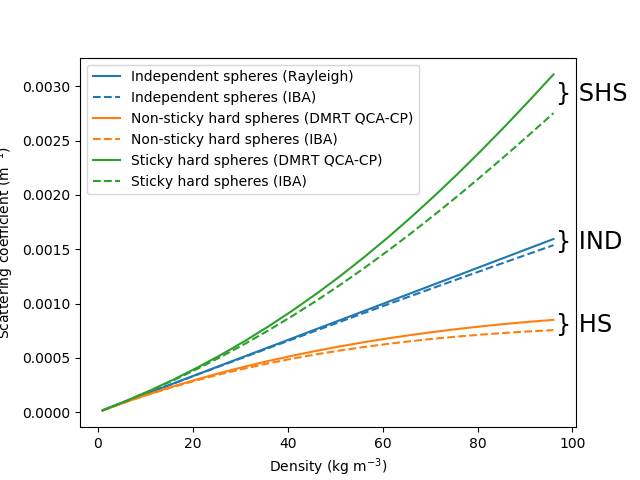

/media/extra/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2141: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


In [2]:
# prepare inputs

sensor = sensor_list.amsre('37V')

radius = 50e-6

density_list = range(1,100, 5)

dmrtks = []
dmrtstks = []
ibaexpks = []
iba_ind_ks = []
iba_shs_ks = []
iba_nshs_ks = []
rayleighks = []

for density in density_list:

    # none sticky hard sphere
    nshsl = make_snow_layer(1, "sticky_hard_spheres", density, radius=radius, stickiness=1000) # to solve infity stickiness, stickiness=1000)
    # sticky hard sphere
    shsl = make_snow_layer(1, "sticky_hard_spheres", density, radius=radius, stickiness=0.15)
    # independent spheres
    indl = make_snow_layer(1, "independent_sphere", density,radius=radius)

    
    em = DMRT_QCACP_ShortRange(sensor, nshsl)
    dmrtks.append(em.ks)

    em = DMRT_QCACP_ShortRange(sensor,shsl)
    dmrtstks.append(em.ks)

    em = Rayleigh(sensor,shsl)
    rayleighks.append(em.ks)

    em = IBA(sensor, indl)
    iba_ind_ks.append(em.ks)
    
    em = IBA(sensor, nshsl)
    iba_nshs_ks.append(em.ks)
    
    em = IBA(sensor, shsl)
    iba_shs_ks.append(em.ks)

lind, = plt.plot (density_list, rayleighks, label='Independent spheres (Rayleigh)')
plt.plot (density_list, iba_ind_ks, '--', label='Independent spheres (IBA)', color=lind.get_color())
lnshs, = plt.plot (density_list, dmrtks, label='Non-sticky hard spheres (DMRT QCA-CP)')
plt.plot (density_list, iba_nshs_ks, '--', label='Non-sticky hard spheres (IBA)', color=lnshs.get_color())
lshs, = plt.plot (density_list, dmrtstks, label='Sticky hard spheres (DMRT QCA-CP)')
plt.plot (density_list, iba_shs_ks, '--', label='Sticky hard spheres (IBA)', color=lshs.get_color())

plt.xlabel('Density (kg m$^{-3}$)')
plt.ylabel('Scattering coefficient (m$^{-1}$)')
plt.legend(loc='best')

def annotate(text, ks1, ks2):
    plt.annotate(text, (0.96, (ks1[-1]+ks2[-1])/2), 
                 textcoords=('axes fraction', 'data'), 
                 fontsize='xx-large',verticalalignment='center')
    
annotate('} SHS', dmrtstks, iba_shs_ks)
annotate('} IND', rayleighks, iba_ind_ks)
annotate('} HS', dmrtks, iba_nshs_ks)

#plt.savefig('fig-sparse-medium.pdf')
